#### Authors: Ali Mujtaba Ahmed - 169038398, Syed Rafae Hashmi - 169032448

# World Air Quality Analysis

In this project, we will be analyzing the World Air Quality data up till March 2024. The dataset contains information about the air quality index (AQI) of different countries and cities around the world, with over 50,000 records and 10 columns. The dataset is sourced from OpenDataSoft.

### 1. Define the Problem

Investigation of the air quality of different countries and cities around the world.

### 2. The datset was downloaded from Kaggle. The link to the dataset is provided below:
https://www.kaggle.com/datasets/kanchana1990/world-air-quality-data-2024-updated/data

### 3. Evaluation
If we can effectively visualize the trends in air quality data, we will consider the project a success. Additionally, if the analysis provides meaningful insights into factors affecting air quality and helps in understanding the current state of air pollution, we will be satisfied with the outcome of the project.

### 4. Features

 The dataset contains the following columns:
* Country Code: Code of the country
* City: Name of the city
* Location: Location of the city
* Coordinates: Coordinates of the city
* Pollutant: Type of pollutant
* Source name: Name of the source
* Unit: Unit of measurement
* Value: Value of the pollutant
* Last updated: Date of last update
* Country Label: Label of the country

In [27]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

In [28]:
# Load the data
data = pd.read_csv('world_air_quality.csv', sep=';')

# Display the first 5 rows of the data
print(data.head())

  Country Code City           Location            Coordinates Pollutant  \
0           JP  NaN  北九州市小倉北区大門一丁目６－４８  33.880833, 130.873056        NO   
1           JP  NaN   北九州市若松区本町三丁目１３－１      33.898056, 130.81       NO2   
2           JP  NaN   北九州市門司区大里原町１２－１２  33.895833, 130.935833       NOX   
3           JP  NaN          千歳市若草４－１３     42.786944, 141.605       NO2   
4           JP  NaN    千葉市稲毛区宮野木町９９６－９  35.653889, 140.097778       NOX   

      Source Name Unit  Value               Last Updated Country Label  
0  japan-soramame  ppm  0.002  2024-03-10T13:30:00+05:30         Japan  
1  japan-soramame  ppm  0.005  2024-03-10T13:30:00+05:30         Japan  
2  japan-soramame  ppm  0.013  2024-03-10T13:30:00+05:30         Japan  
3  japan-soramame  ppm  0.004  2024-03-10T13:30:00+05:30         Japan  
4  japan-soramame  ppm  0.003  2024-03-10T13:30:00+05:30         Japan  


After we load in the dataset and view the first few columns, it is a good idea to check for missing values, repeated values, and data types of the columns (especially the date/time columns). This will help us in cleaning the data and preparing it for analysis.

In [29]:
# Fix the date/time column
data['Last Updated'] = pd.to_datetime(data['Last Updated']) # Convert the column to datetime
data['Last Updated'] = data['Last Updated'].dt.tz_localize(None) # Remove the timezone information

print(data.head())

  Country Code City           Location            Coordinates Pollutant  \
0           JP  NaN  北九州市小倉北区大門一丁目６－４８  33.880833, 130.873056        NO   
1           JP  NaN   北九州市若松区本町三丁目１３－１      33.898056, 130.81       NO2   
2           JP  NaN   北九州市門司区大里原町１２－１２  33.895833, 130.935833       NOX   
3           JP  NaN          千歳市若草４－１３     42.786944, 141.605       NO2   
4           JP  NaN    千葉市稲毛区宮野木町９９６－９  35.653889, 140.097778       NOX   

      Source Name Unit  Value        Last Updated Country Label  
0  japan-soramame  ppm  0.002 2024-03-10 13:30:00         Japan  
1  japan-soramame  ppm  0.005 2024-03-10 13:30:00         Japan  
2  japan-soramame  ppm  0.013 2024-03-10 13:30:00         Japan  
3  japan-soramame  ppm  0.004 2024-03-10 13:30:00         Japan  
4  japan-soramame  ppm  0.003 2024-03-10 13:30:00         Japan  


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54255 entries, 0 to 54254
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Country Code   54255 non-null  object        
 1   City           30209 non-null  object        
 2   Location       54253 non-null  object        
 3   Coordinates    54185 non-null  object        
 4   Pollutant      54255 non-null  object        
 5   Source Name    54255 non-null  object        
 6   Unit           54255 non-null  object        
 7   Value          54255 non-null  float64       
 8   Last Updated   54255 non-null  datetime64[ns]
 9   Country Label  54140 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 4.1+ MB


In [31]:
data.isna().sum()


Country Code         0
City             24046
Location             2
Coordinates         70
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      115
dtype: int64

As we can see from above we do have some missing values in the dataset. We will need to handle these missing values before we can proceed with the analysis.

First lets check which country labels have missing values.

In [32]:
data.loc[data['Country Label'].isnull() == True]

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
1115,XK,"Prishtina, KHMI","Prishtina, KHMI","42.648872, 21.137121",O3,Kosovo,µg/m³,2.6,2023-05-26 03:30:00,NaN
1116,XK,Mobile,Mobile,"42.646519, 21.133536",NO2,Kosovo,µg/m³,63.2,2023-05-25 04:30:00,NaN
3724,XK,Mitrovica,Mitrovica,"42.891794, 20.868936",NO2,Kosovo,µg/m³,4.6,2023-05-26 03:30:00,NaN
3725,XK,"Prishtina, KHMI","Prishtina, KHMI","42.648872, 21.137121",PM2.5,Kosovo,µg/m³,12.0,2023-05-26 03:30:00,NaN
3726,XK,"Prishtina, Rilindja","Prishtina, Rilindja","42.659656, 21.157309",PM10,Kosovo,µg/m³,19.6,2023-05-26 03:30:00,NaN
...,...,...,...,...,...,...,...,...,...,...
53893,XK,Pristina,US Diplomatic Post: Pristina,"42.661995, 21.15055",PM2.5,StateAir_Pristina,µg/m³,18.0,2023-05-31 05:30:00,NaN
53894,XK,"Prishtina, Rilindja","Prishtina, Rilindja","42.659656, 21.157309",PM2.5,Kosovo,µg/m³,13.1,2023-05-26 03:30:00,NaN
53895,XK,Dardhishtë,Dardhishtë,"42.659728, 21.083317",PM10,Kosovo,µg/m³,13.7,2023-05-26 03:30:00,NaN
53896,XK,Dardhishtë,Dardhishtë,"42.659728, 21.083317",SO2,Kosovo,µg/m³,0.0,2023-05-26 03:30:00,NaN


If we look at the country code for missing values, we can guess the country label for the missing values. For example, if the country code is 'JP' (Japan), we can guess that the country label is 'Japan'. We can use this information to fill in the missing values in the country label column.

In [33]:
# Add contry code for missing values
country_code_to_label = {
    'XK': 'Kosovo',
    'KV': 'Kosovo',
    'AJ': 'Azerbaijan',
    'CE': 'Sri Lanka',
    'UC': 'Curacao',
    'CW': 'Curacao',
    'TI': 'Tajikistan',
    'IZ': 'Iraq',
    'KU': 'Kuwait',
    'BK': 'Bosnia and Herzegovina',
    'VM': 'Vietnam',
    'AQ': 'American Samoa',
    'TX': 'Turkmenistan',
    'MK': 'Macedonia'
}

# Loop through rows and fill missing values based on country code
for index, row in data.iterrows():
    if pd.isna(row['Country Label']) and row['Country Code'] in country_code_to_label:
        data.at[index, 'Country Label'] = country_code_to_label[row['Country Code']]

# Fill the remaining missing values with 'N/A'
for column in ['City', 'Location', 'Coordinates']:
    data[column] = data[column].fillna('N/A')
    
# Check if there are any missing values left
data.isna().sum()

Country Code     0
City             0
Location         0
Coordinates      0
Pollutant        0
Source Name      0
Unit             0
Value            0
Last Updated     0
Country Label    0
dtype: int64

Now lets check for duplicates in the dataset.

In [34]:
# Check for duplicates
duplicates = data.duplicated()
print(duplicates.sum())

0


As we can see, now there are no missing values or duplicates in the dataset. We can now proceed with the analysis.

There are some values in the dataset which are irregular. For example, the value of the pollutant is negative, which is not possible. We will need to remove these values from the dataset for a more accurate analysis.

In [35]:
data = data.drop(data[data['Value'] < 0].index)

There are also some uncommon unit values in the dataset. We will need to remove these values as well.

In [36]:
data = data.drop(data[data['Unit'] == 'particles/cm³'].index)
data = data.drop(data[data['Unit'] == '%'].index)
data = data.drop(data[data['Unit'] == 'c'].index)

Now lets start with the analysis of the dataset.

Lets see what the most common source names and units are in the dataset.

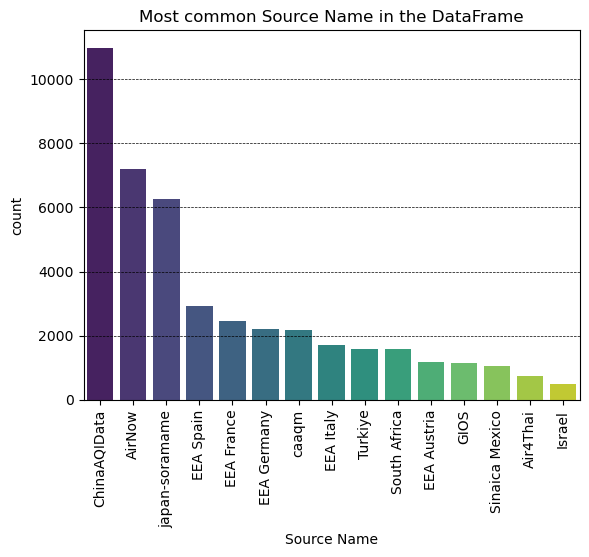

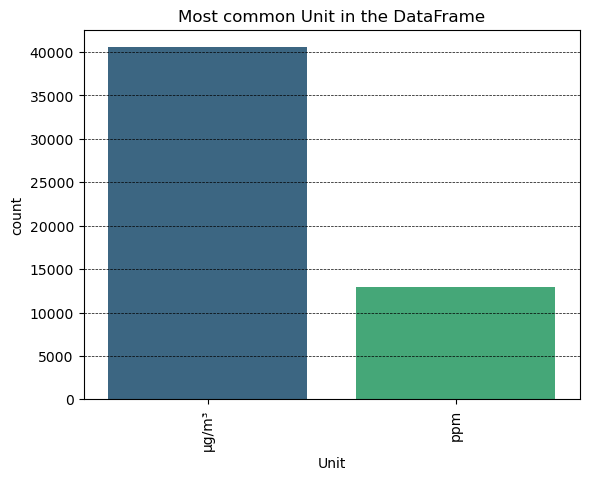

In [37]:
# Visualization for source name
sns.barplot(x = data['Source Name'].value_counts()[:15].index, y = data['Source Name'].value_counts()[:15], palette='viridis')
plt.xticks(rotation = 90)
plt.grid(color='black', linestyle='--', linewidth=0.5, which='both', axis='y')
plt.title('Most common Source Name in the DataFrame')
plt.show()

# Visualization for unit
sns.barplot(x = data['Unit'].value_counts()[:15].index, y = data['Unit'].value_counts()[:15], palette='viridis')
plt.xticks(rotation = 90)
plt.grid(color='black', linestyle='--', linewidth=0.5, which='both', axis='y')
plt.title('Most common Unit in the DataFrame')
plt.show()

The first graph is a bar chart titled "Most common Source Name in the DataFrame", showing the frequency of various data source names, with "ChinaAQData" having the highest count, exceeding 10,000 instances, followed by "AirNow" and "Japan-soramame" among others. The bars are colored in shades of purple and blue, and each source name is labeled on the x-axis.

The second graph is a bar chart titled "Most common Unit in the DataFrame", displaying the count of two different units of measurement used within a dataset: "µg/m³" and "ppm". The unit "µg/m³" is much more common, with a count close to 40,000, while "ppm" has a count of around 10,000. The bars are colored in shades of blue and green, respectively, with the units labeled on the x-axis.

First, we will find the most common pollutants in the dataset and make a bar plot to visualize the data.

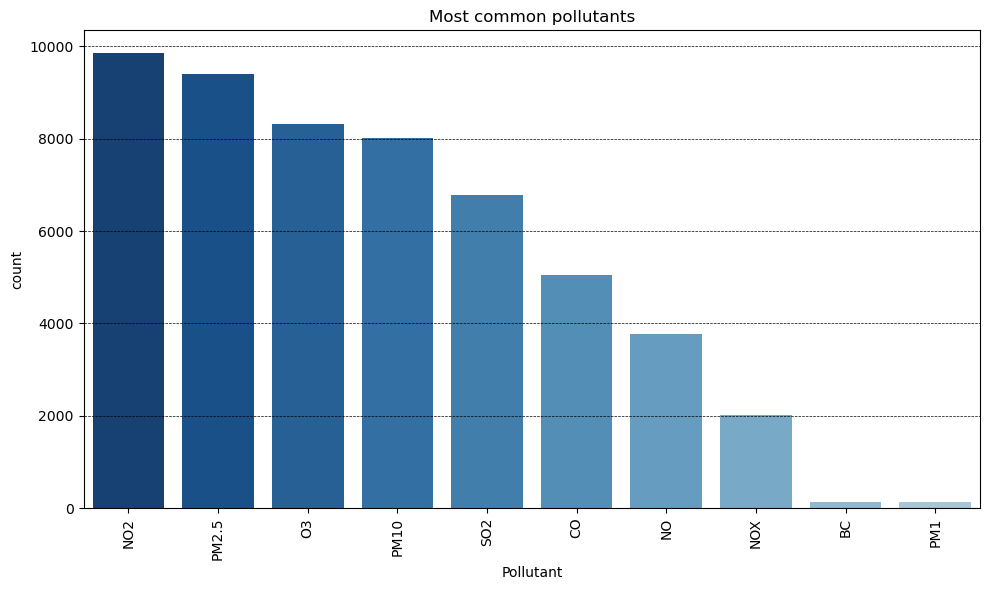

In [38]:
# Get the most common pollutant values
top_pollutants = data['Pollutant'].value_counts().head(15)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pollutants.index, y=top_pollutants, palette=sns.color_palette("Blues", n_colors=15)[::-1])

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add grid
plt.grid(color='black', linestyle='--', linewidth=0.5, which='both', axis='y')

# Add title
plt.title('Most common pollutants')

# Show the plot
plt.tight_layout()
plt.show()

This chart represents the frequency of different air pollutants within a dataset. NO2, PM2.5, and O3 appear to be the most frequently occurring pollutants, with counts near or above 8,000. The chart indicates a descending order of prevalence with other pollutants like PM10, SO2, CO, and lesser quantities of NO, NOX, BC, and PM1, all indicated by counts on the y-axis and pollutant types on the x-axis, with bars in varying shades of blue.

Now, lets find the most common country labels in the dataset.

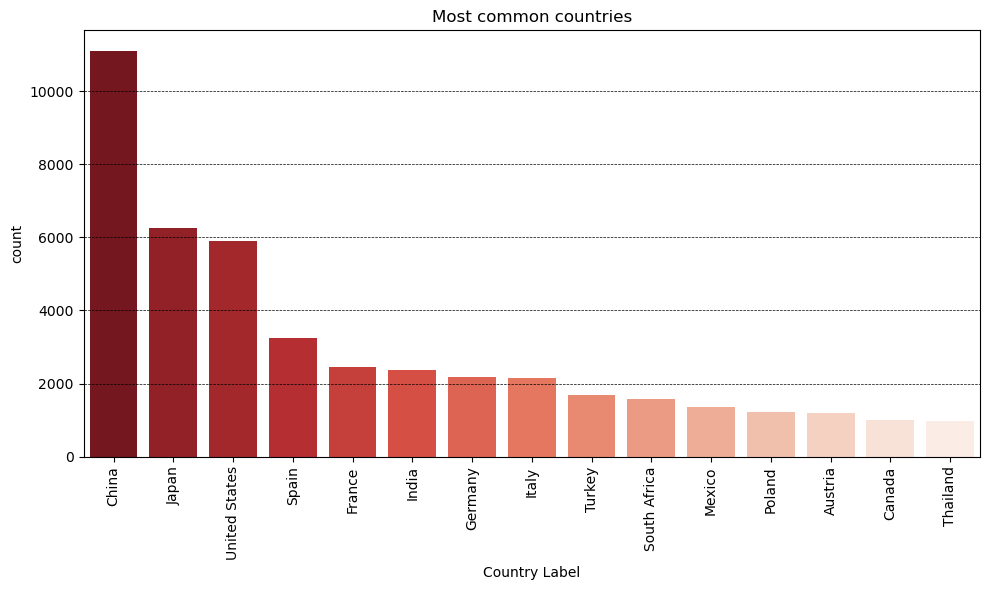

In [39]:
# Get the most common country labels
top_countries = data['Country Label'].value_counts().head(15)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries, palette=sns.color_palette("Reds", n_colors=15)[::-1])
plt.xticks(rotation=90)
plt.grid(color='black', linestyle='--', linewidth=0.5, which='both', axis='y')
plt.title('Most common countries')
plt.tight_layout()

plt.show()

The chart displays the count of data points from various countries within a dataset. China has the highest count, reaching just over 10,000 instances, followed by Japan and the United States with fewer instances. The bars are colored in a gradient of red, progressively getting lighter with countries that have fewer data points, with each country's name listed on the x-axis.

Lets do an analysis of some more specific information.

We will find the cities with pollutants with each of the units in the dataset.

In [40]:
unique_units = data['Unit'].unique()

print(unique_units)

['ppm' 'µg/m³']


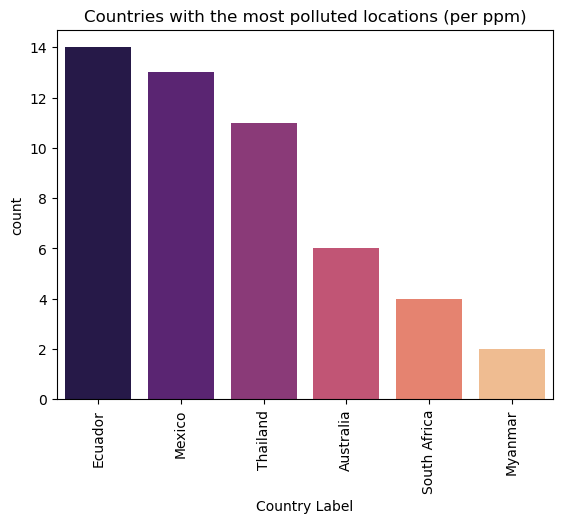

In [41]:
# Filter data for ppm unit
ppm = data.loc[data['Unit'] == 'ppm'].sort_values(by='Value', ascending=False)[:50]
ppm = ppm['Country Label'].value_counts()

sns.barplot(x=ppm.index, y=ppm, palette='magma')
plt.title('Countries with the most polluted locations (per ppm)')
plt.xticks(rotation=90)
plt.show()

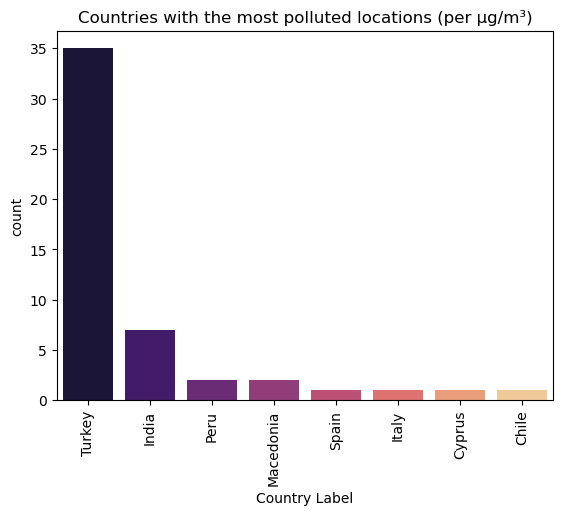

In [42]:
# Filter data for ugm3 unit
ugm3 = data.loc[data['Unit'] == 'µg/m³'].sort_values(by='Value', ascending=False)[:50]
ugm3['Country Label'] = ugm3['Country Label'].replace('Macedonia, The former Yugoslav Rep. of', 'Macedonia')
ugm3 = ugm3['Country Label'].value_counts()

sns.barplot(x=ugm3.index, y=ugm3, palette='magma')
plt.title('Countries with the most polluted locations (per µg/m³)')
plt.xticks(rotation=90)
plt.show()

The first graph is a bar chart titled "Countries with the most polluted locations (per ppm)," which shows Ecuador, Mexico, and Thailand having the highest count of pollution measurements in parts per million, with counts decreasing from left to right for other countries like Australia, South Africa, and Myanmar.

The second graph, also a bar chart with the title "Countries with the most polluted locations (per µg/m³)," depicts Turkey with the highest count of pollution measurements in micrograms per cubic meter, followed by significantly lower counts for India and a series of other countries with even fewer counts, such as Peru, Macedonia, and Chile.

Now, lets find out which pollutants are most common in each country.

In [43]:
unique_pollutants = data['Pollutant'].unique()

print(unique_pollutants)

['NO' 'NO2' 'NOX' 'SO2' 'PM2.5' 'CO' 'O3' 'PM10' 'PM1' 'BC']


Next we will visualize the top 10 most and least polluted cities in the with respect to each pollutant.

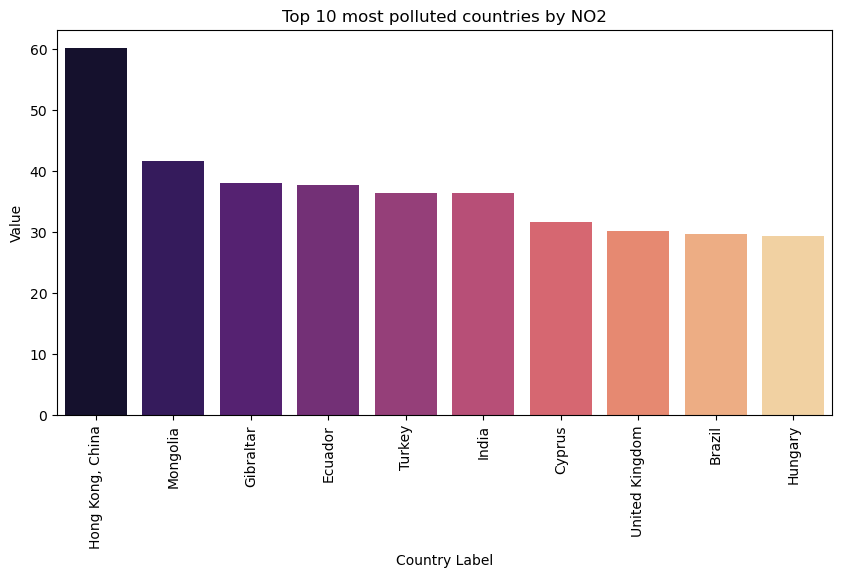

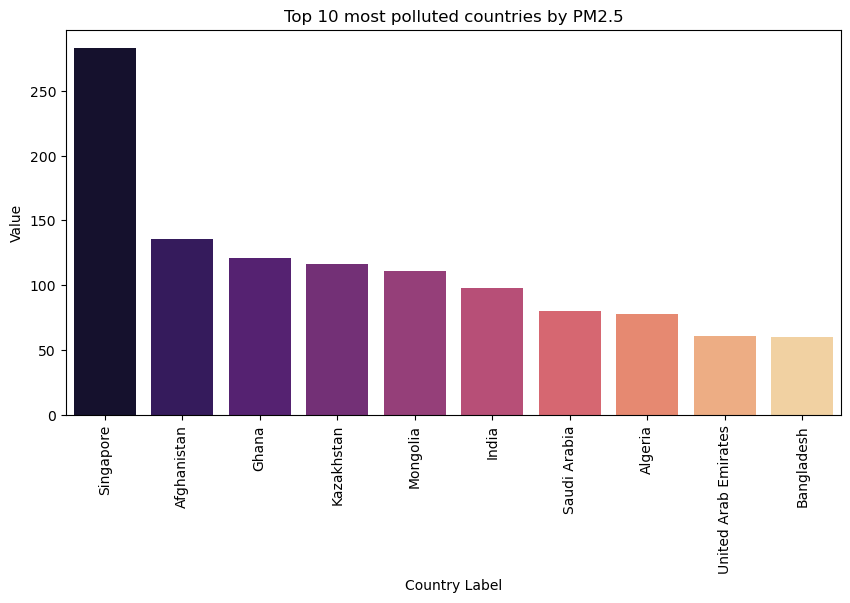

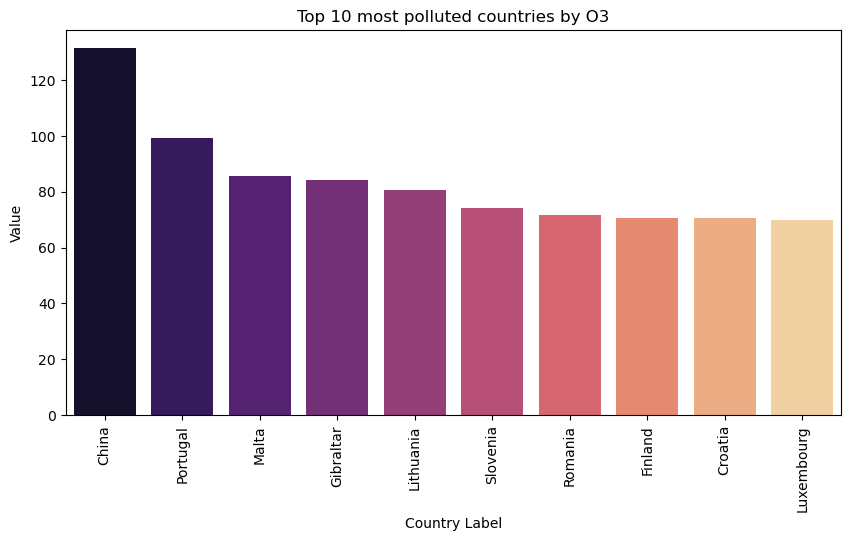

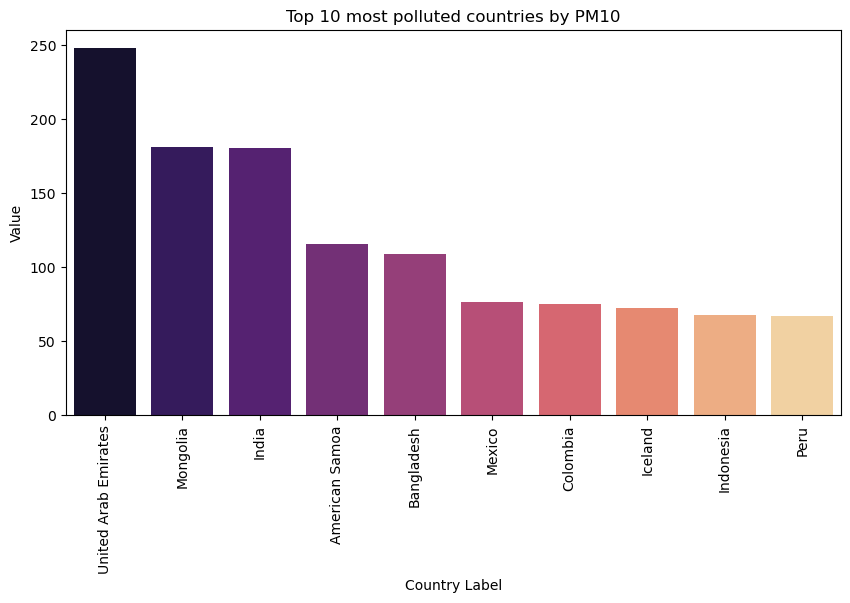

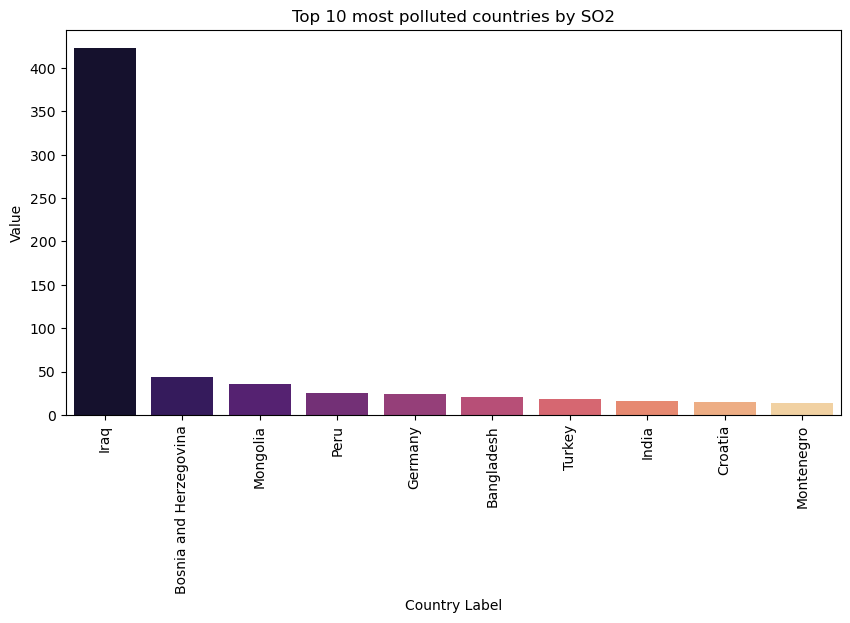

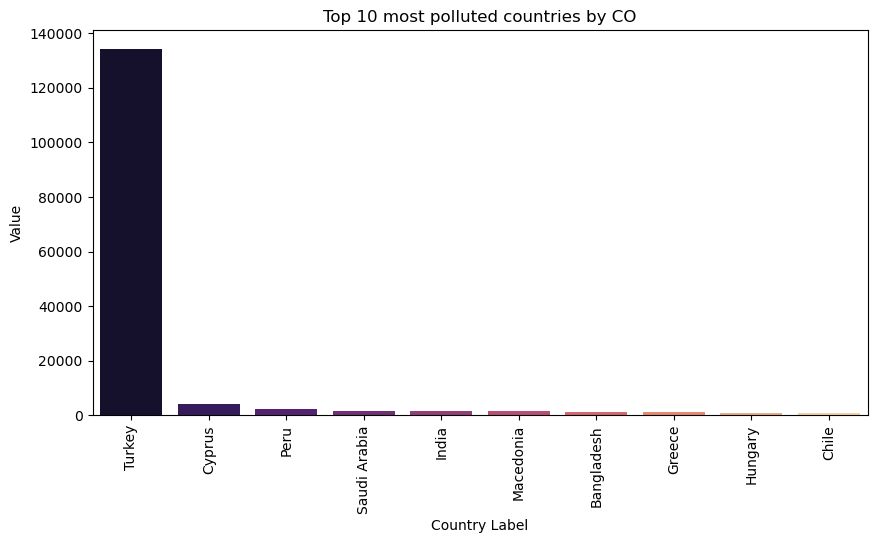

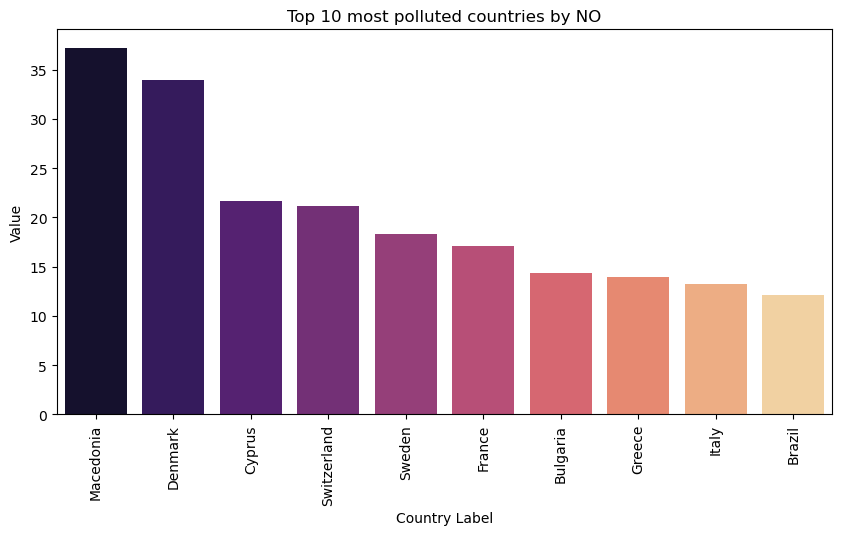

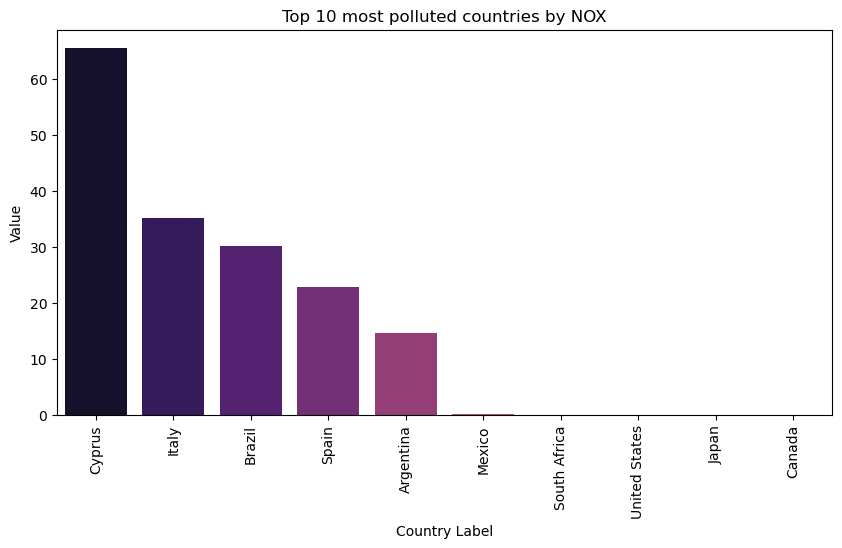

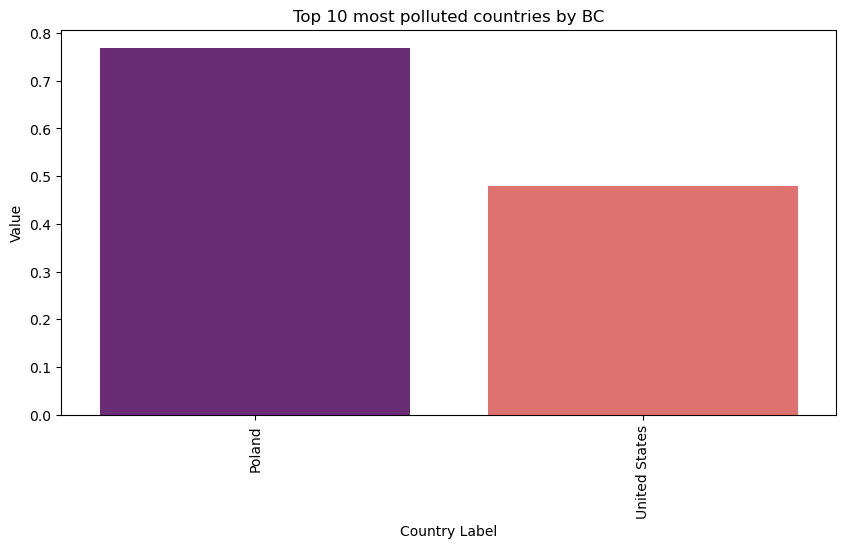

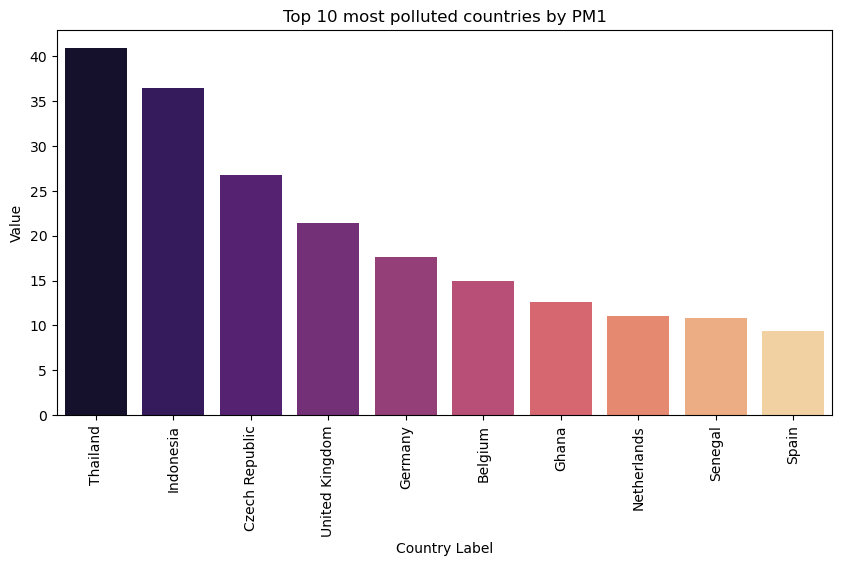

In [44]:
# Loop through each type of pollutant
for type in ['NO2', 'PM2.5', 'O3', 'PM10', 'SO2', 'CO', 'NO', 'NOX', 'BC', 'PM1']:
    # Calculate mean
    pollutant = data.loc[data['Pollutant'] == type].groupby('Country Label')['Value'].mean().sort_values(ascending=False)
    pollutant.index = pollutant.index.to_series().replace('Macedonia, The former Yugoslav Rep. of', 'Macedonia')

    plt.figure(figsize=(10, 5))
    sns.barplot(x=pollutant[:10].index, y=pollutant[:10], palette='magma')
    plt.xticks(rotation=90)
    plt.title(f'Top 10 most polluted countries by {type}')
    plt.show()

The series of bar charts each depict the "Top 10 most polluted countries" by different pollutants such as NO2, PM2.5, O3, PM10, CO, NO, NOX, BC, and PM1. The bars represent pollution levels with the countries labeled on the x-axis and the pollution values on the y-axis.

Focusing on Turkey, it indicates significant pollution levels:

    - Turkey tops the chart for the most polluted country by CO with a value surpassing 120,000, which is significantly higher than the other countries listed.

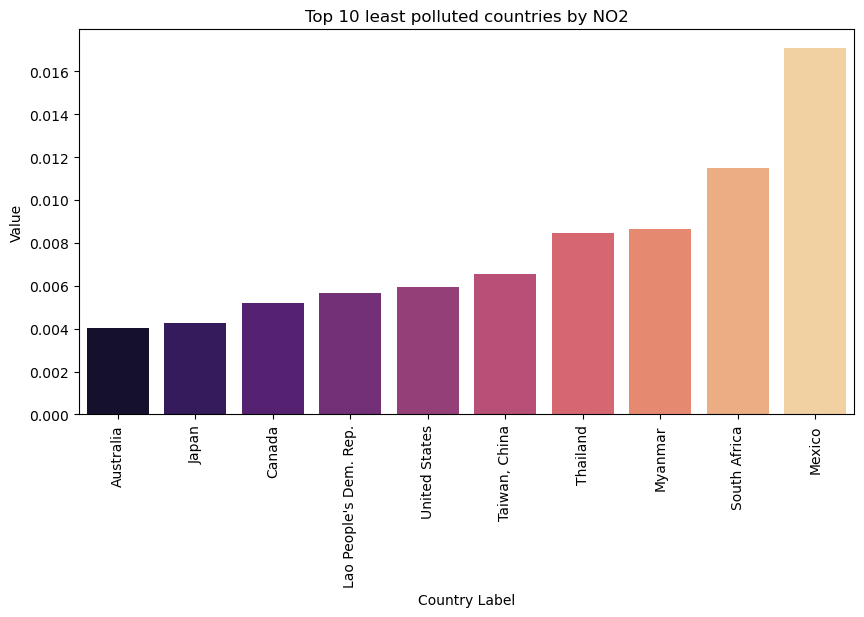

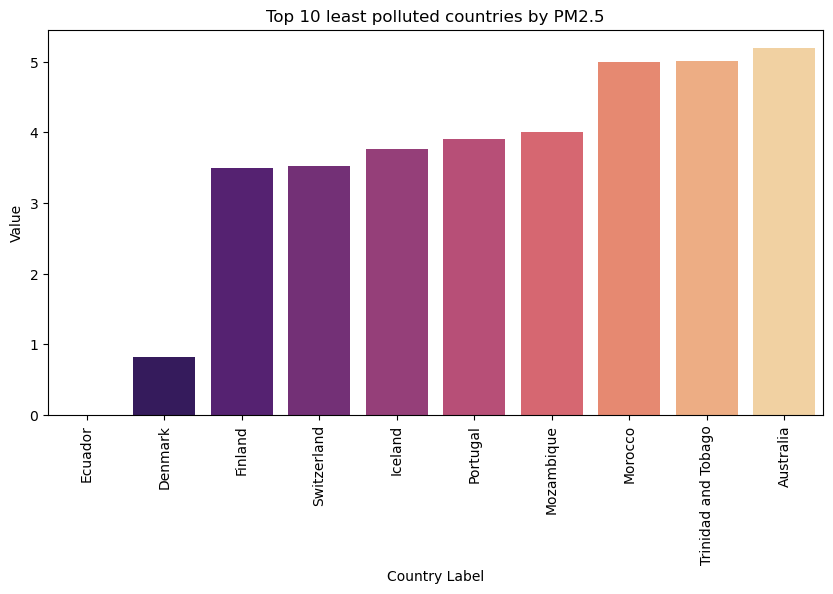

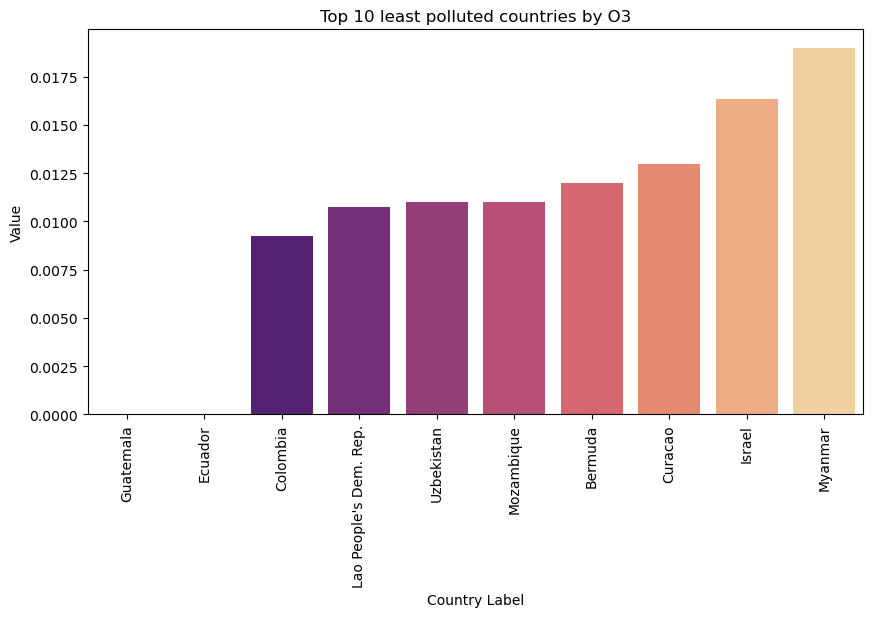

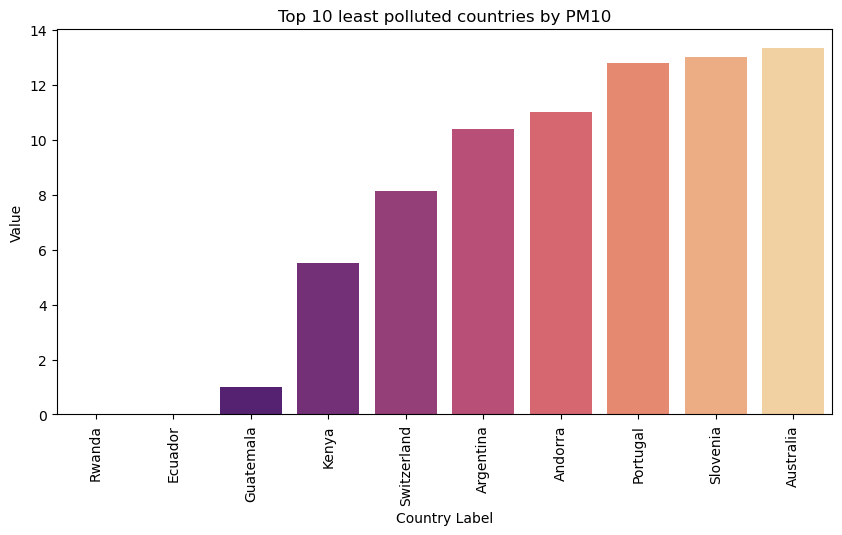

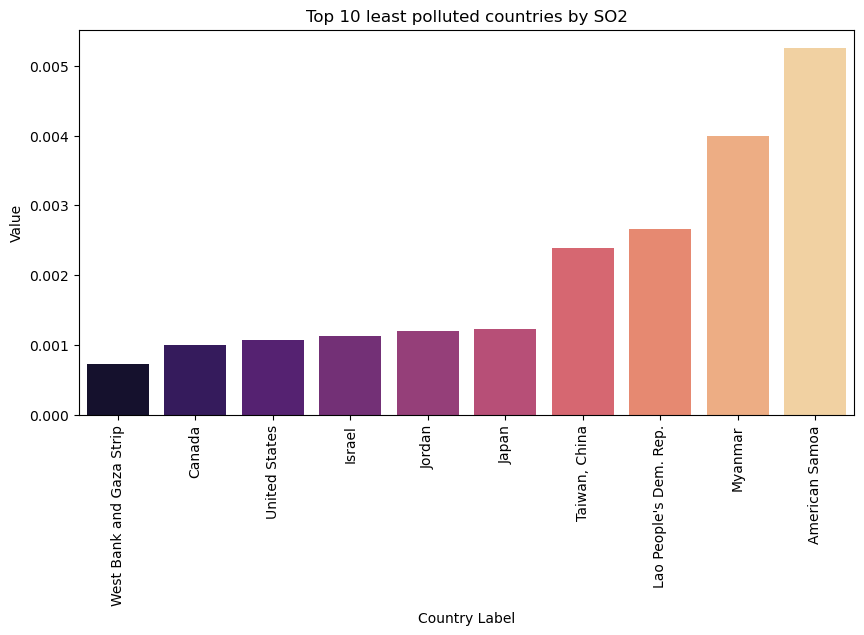

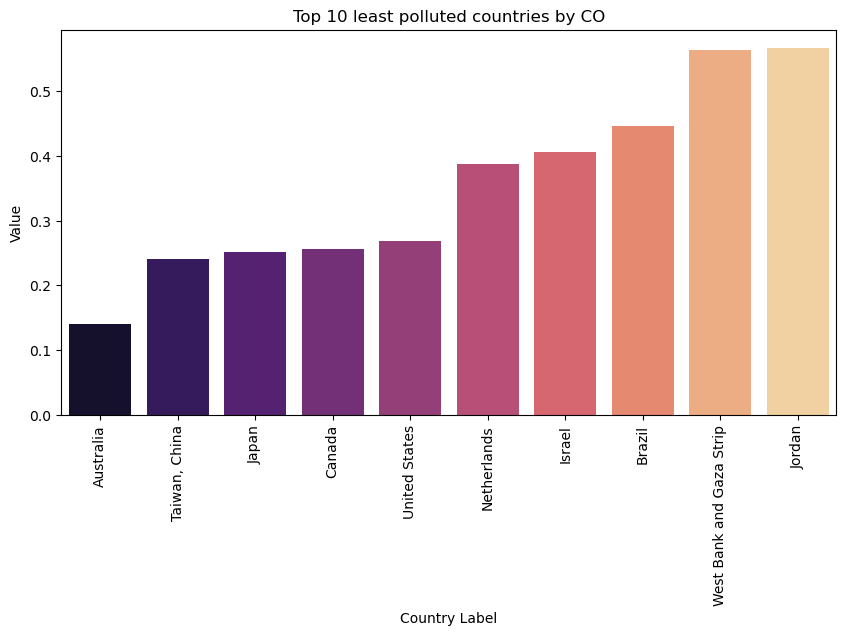

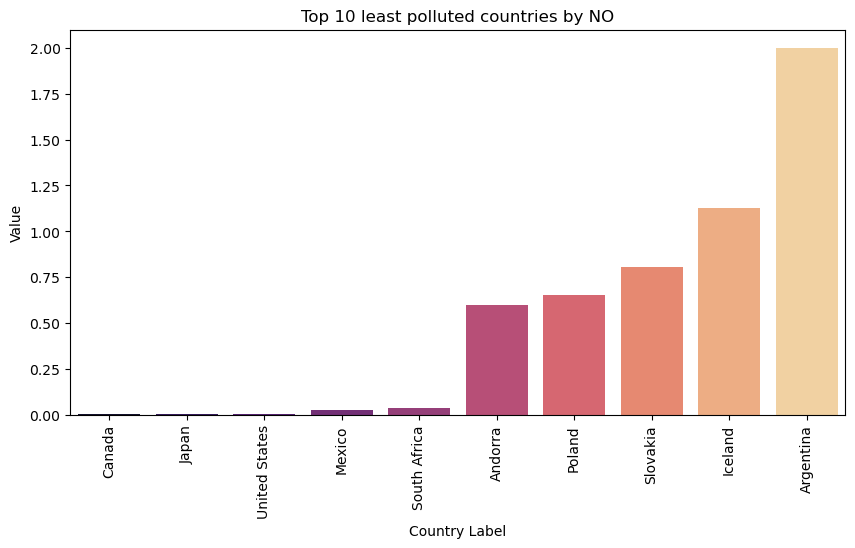

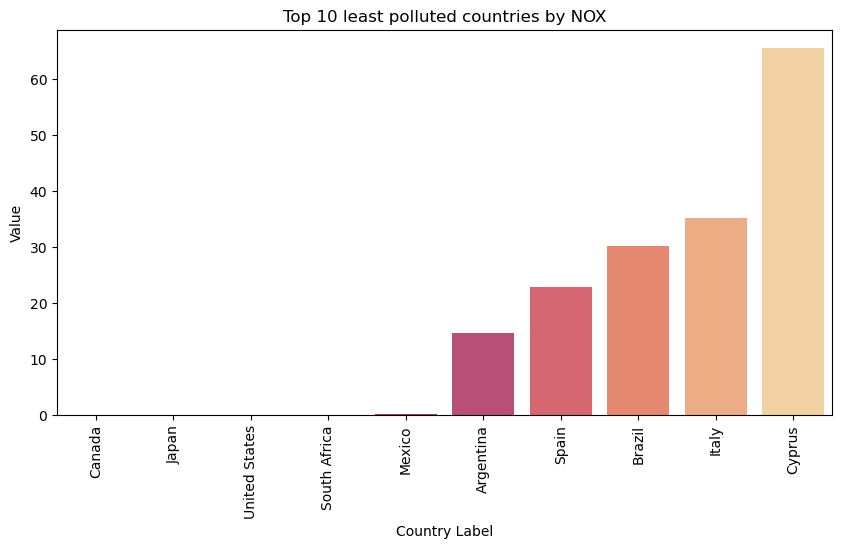

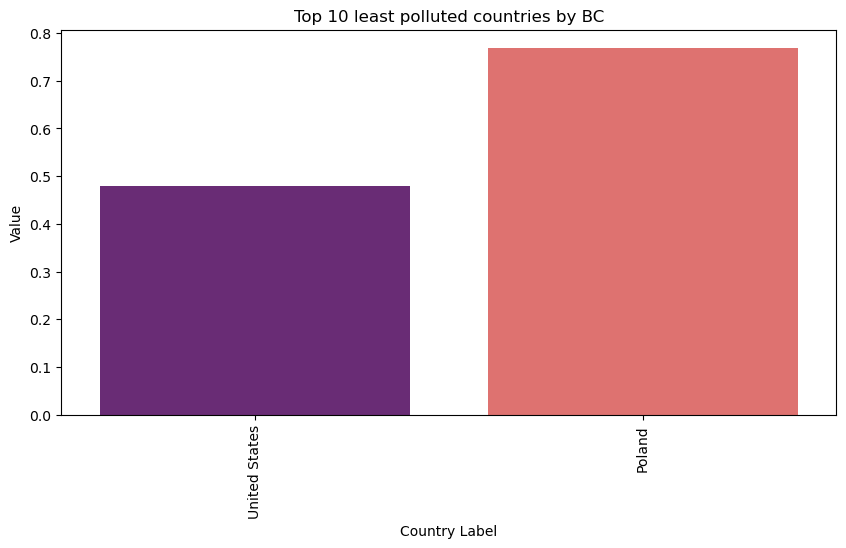

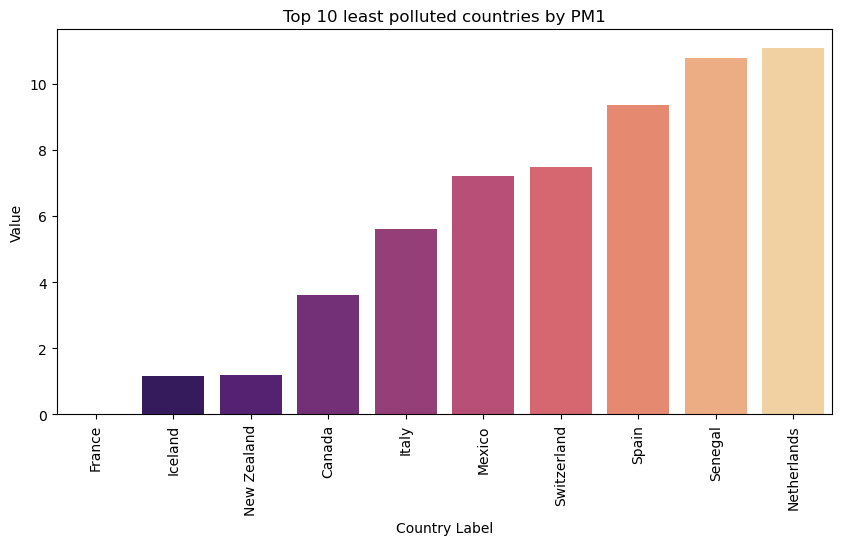

In [45]:
# Loop through each type of pollutant
for type in ['NO2', 'PM2.5', 'O3', 'PM10', 'SO2', 'CO', 'NO', 'NOX', 'BC', 'PM1']:
    # Calculate mean
    pollutant = data.loc[data['Pollutant'] == type].groupby('Country Label')['Value'].mean().sort_values(ascending=True)
    pollutant.index = pollutant.index.to_series().replace('Macedonia, The former Yugoslav Rep. of', 'Macedonia')

    # Create figure and plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pollutant[:10].index, y=pollutant[:10], palette='magma')
    plt.xticks(rotation=90)
    plt.title(f'Top 10 least polluted countries by {type}')
    plt.show()

The bar charts depict the top 10 least polluted countries by various pollutants (NO2, PM2.5, O3, PM10, SO2, CO, NO, NOX, BC, PM1).

For Turkey specifically:

    - Turkey is notably the least polluted country by CO, with the value on the bar chart appearing significantly lower than the other countries.
    - Turkey is not featured in the top 10 least polluted countries for NO2, PM2.5, O3, PM10, SO2, and PM1.

These observations highlight that Turkey has relatively low levels of pollution for CO and NOX compared to other countries included in the data.

Next, lets check the most polluted country and the most common pollutant. We will also make a comparison of CO vs O3 (ozone) in the most polluted country.

In [46]:
pollutant_counts = data['Pollutant'].value_counts()

top_two_pollutants = pollutant_counts.head(2)
print("The top two most common pollutants are:")
print(top_two_pollutants)

The top two most common pollutants are:
Pollutant
NO2      9854
PM2.5    9398
Name: count, dtype: int64


In [47]:
mean_pollution_by_country = data.groupby('Country Label')['Value'].mean().sort_values(ascending=False)

most_polluted_country = mean_pollution_by_country.idxmax()
highest_pollution_value = mean_pollution_by_country.max()

print(f"The most polluted country is {most_polluted_country} with an average pollution value of {highest_pollution_value:.2f}.")

The most polluted country is Turkey with an average pollution value of 18228.05.


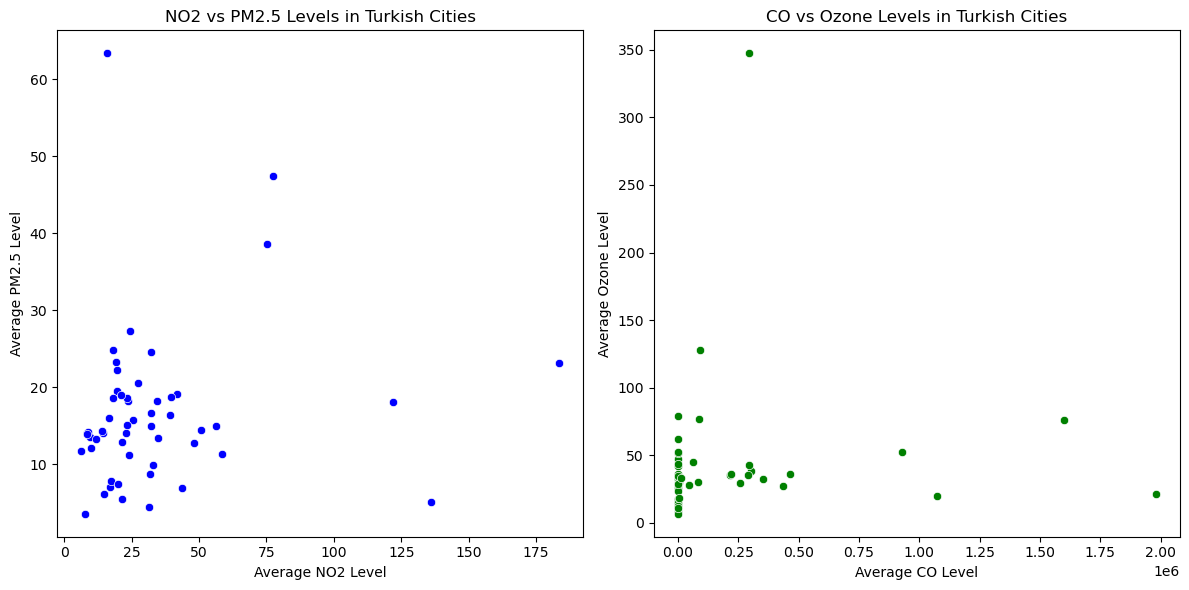

In [48]:
# Filter data for Turkey and for the four pollutants
turkey_data = data[(data['Country Label'] == 'Turkey') & (data['Pollutant'].isin(['NO2', 'PM2.5', 'CO', 'O3']))]
pivot_turkey = turkey_data.pivot_table(index='City', columns='Pollutant', values='Value', aggfunc='mean')
pivot_turkey.dropna(inplace=True)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=pivot_turkey['NO2'], y=pivot_turkey['PM2.5'], ax=axs[0], color='blue')
axs[0].set_xlabel('Average NO2 Level')
axs[0].set_ylabel('Average PM2.5 Level')
axs[0].set_title('NO2 vs PM2.5 Levels in Turkish Cities')

sns.scatterplot(x=pivot_turkey['CO'], y=pivot_turkey['O3'], ax=axs[1], color='green')
axs[1].set_xlabel('Average CO Level')
axs[1].set_ylabel('Average Ozone Level')
axs[1].set_title('CO vs Ozone Levels in Turkish Cities')

plt.tight_layout()
plt.show()

Both plots are color-coded (blue for NO2 and PM2.5, green for CO and Ozone). The first plot is labeled "NO2 vs PM2.5 Levels in Turkish Cities" and plots the average levels of NO2 on the x-axis against PM2.5 on the y-axis. The data points are mostly clustered in the lower end of both axes, suggesting that for the majority of observations, the levels of NO2 and PM2.5 are relatively low. However, there are a few outliers with higher levels of both pollutants.

The second plot is labeled "CO vs Ozone Levels in Turkish Cities" and compares the average levels of Carbon Monoxide (CO) on the x-axis to Ozone on the y-axis. The CO levels on the x-axis are in a higher range, as indicated by the notation 1e6 (which means multiplied by one million), showing that CO values are measured in a larger scale. The data points are clustered towards the lower end of the CO axis and spread out along the Ozone axis, indicating a variety of ozone levels but generally low CO levels in the dataset.

It is also a good idea to see how these 4 pollutants have been changing over time. We will plot the trends of these pollutants over time.

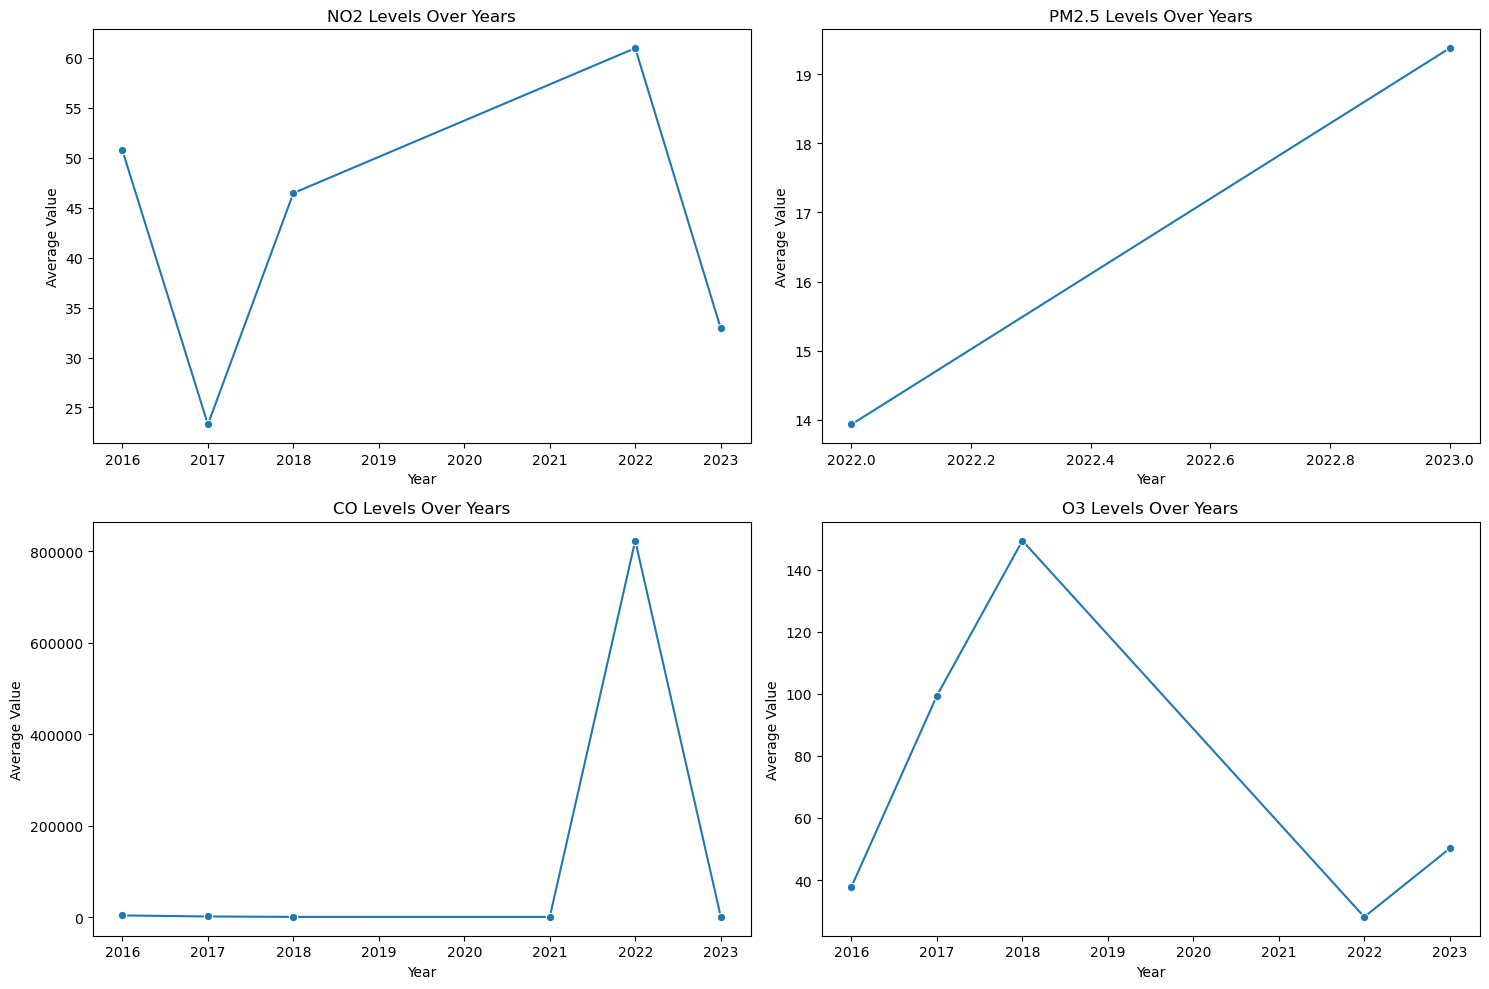

In [49]:
data['Year'] = data['Last Updated'].dt.year

# Filter data for Turkey
turkey_data = data[data['Country Label'] == 'Turkey']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
pollutants = ['NO2', 'PM2.5', 'CO', 'O3']
titles = ['NO2 Levels Over Years', 'PM2.5 Levels Over Years', 'CO Levels Over Years', 'O3 Levels Over Years']

# Loop over each pollutant and plot a line chart
for i, pollutant in enumerate(pollutants):
    ax = axs[i//2, i%2]
    pollutant_data = turkey_data[turkey_data['Pollutant'] == pollutant]
    yearly_data = pollutant_data.groupby('Year')['Value'].mean()
    
    sns.lineplot(x=yearly_data.index, y=yearly_data, ax=ax, marker='o')
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Value')
    
plt.tight_layout()
plt.show()

The first graph, "NO2 Levels Over Years," shows fluctuations in nitrogen dioxide levels, with a sharp dip in 2018, an increase until 2021, and then a steep decline in 2022.

The second graph, "PM2.5 Levels Over Years," depicts a steady increase in fine particulate matter from 2022 to 2023. Since it only shows data for two points, this might indicate a short-term trend or a limited dataset.

The third graph, "CO Levels Over Years," displays carbon monoxide levels with dramatic variation, including an extreme spike in 2021 followed by a sharp decrease in 2022, suggesting an anomalous event or data error in 2021.

The fourth graph, "O3 Levels Over Years," illustrates ozone levels with a peak in 2020, a sharp fall in 2021, and a partial recovery in 2022.

Each graph presents different trends and variabilities, which could be influenced by multiple factors such as changes in emissions, regulatory measures, economic activity, or even data collection methods.

C:\Users\srafa\AppData\Local\Temp\ipykernel_14072\1797326960.py:35: UserWarning:

The figure layout has changed to tight



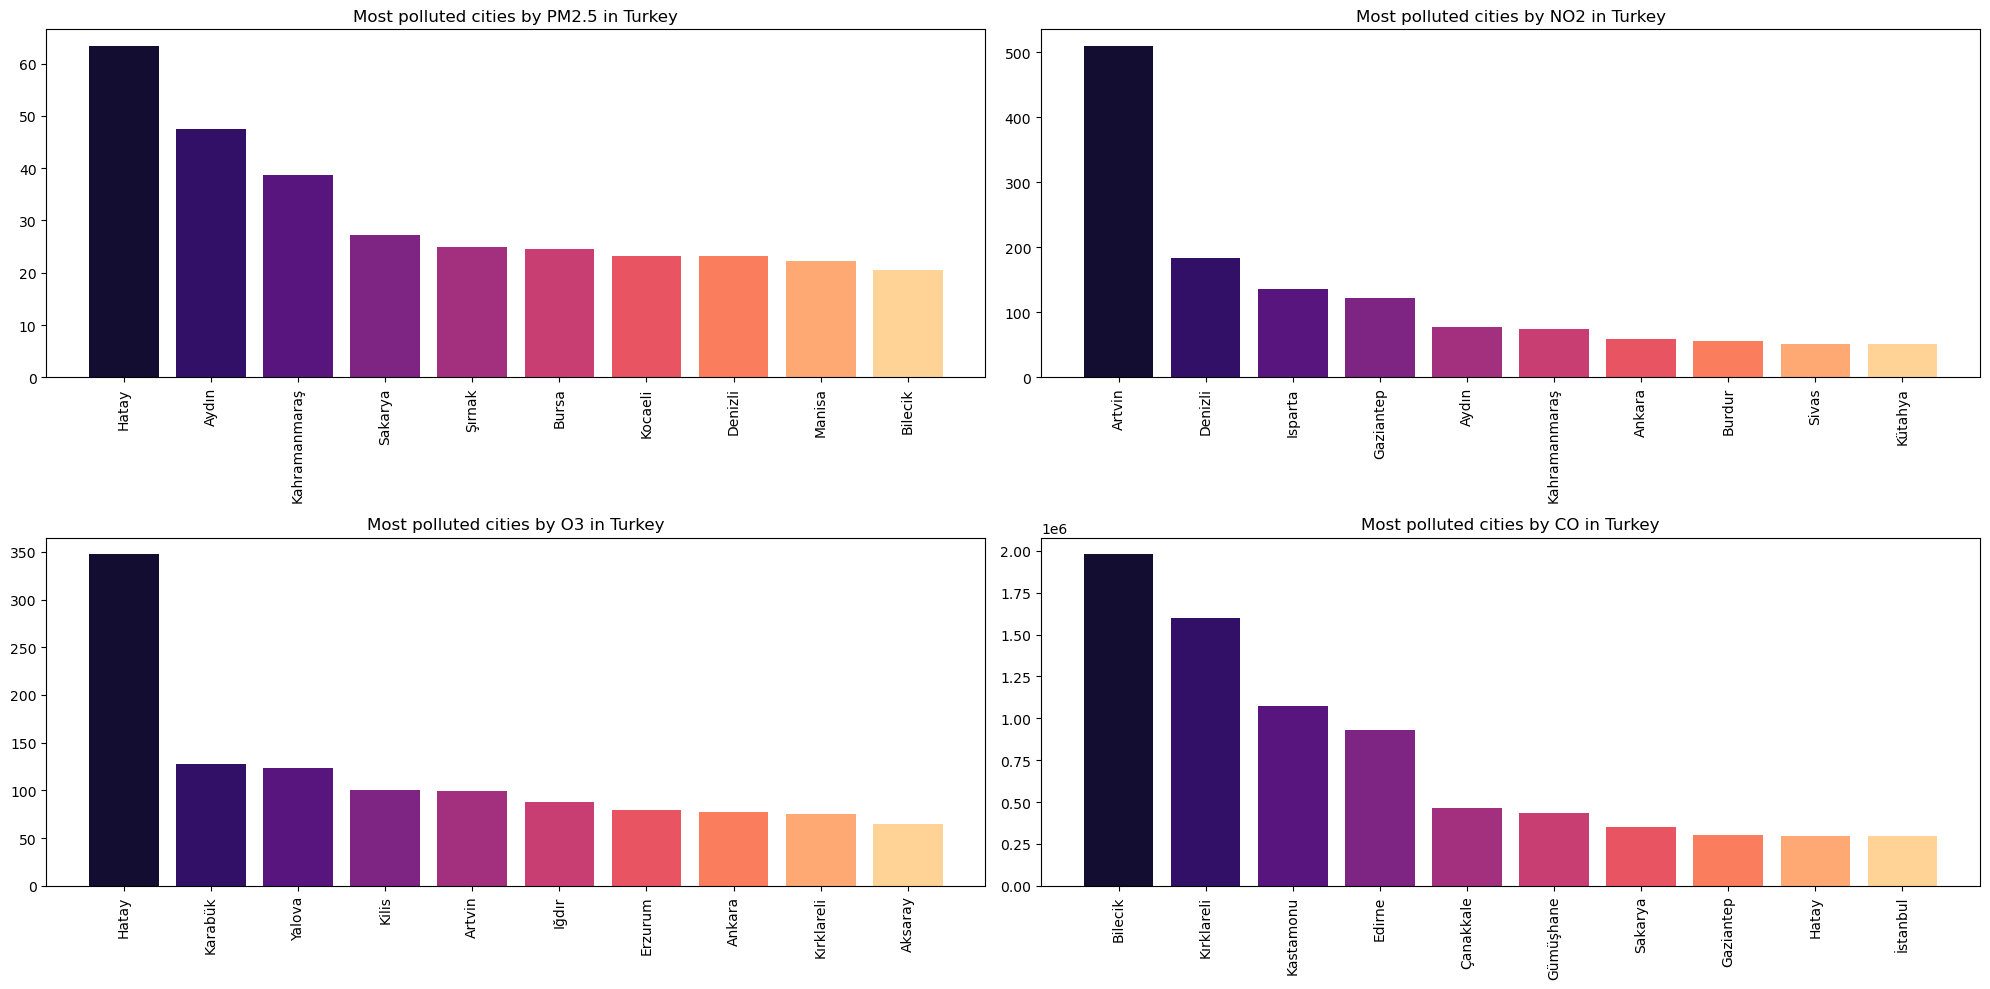

In [50]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained", figsize=(20, 10))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

country_to_search = 'Turkey'
country_info = data.loc[data['Country Label'] == country_to_search]

country_PM25 = country_info.loc[country_info['Pollutant'] == 'PM2.5'].groupby('City')['Value'].mean().sort_values(ascending=False)
country_NO2 = country_info.loc[country_info['Pollutant'] == 'NO2'].groupby('City')['Value'].mean().sort_values(ascending=False)
country_O3 = country_info.loc[country_info['Pollutant'] == 'O3'].groupby('City')['Value'].mean().sort_values(ascending=False)
country_CO = country_info.loc[country_info['Pollutant'] == 'CO'].groupby('City')['Value'].mean().sort_values(ascending=False)

ax1.bar(x = country_PM25[:10].index, height = country_PM25[:10], color = sns.color_palette('magma', 10))
ax1.set_title(f'Most polluted cities by PM2.5 in {country_to_search}')
ax1.tick_params(axis='x', rotation=90)

ax2.bar(x = country_NO2[:10].index, height = country_NO2[:10], color = sns.color_palette('magma', 10))
ax2.set_title(f'Most polluted cities by NO2 in {country_to_search}')
ax2.tick_params(axis='x', rotation=90)

ax3.bar(x = country_O3[:10].index, height = country_O3[:10], color = sns.color_palette('magma', 10))
ax3.set_title(f'Most polluted cities by O3 in {country_to_search}')
ax3.tick_params(axis='x', rotation=90)

ax4.bar(x = country_CO[:10].index, height = country_CO[:10], color = sns.color_palette('magma', 10))
ax4.set_title(f'Most polluted cities by CO in {country_to_search}')
ax4.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

There are four bar charts, each depicting the most polluted cities in Turkey based on different air pollutants: PM2.5, NO2, O3, and CO.

    - The first chart shows cities with PM2.5 levels, with the highest bar indicating the city with the most PM2.5 pollution. The bars decrease in height from left to right, representing lower levels of PM2.5.

    - The second chart ranks cities by NO2 levels. Similar to the first, the highest bar indicates the most pollution, with a decreasing trend as you move right.

    - The third chart displays O3 levels across different cities. The leftmost bar is significantly higher than the others, indicating a city with a notably high level of ozone pollution.

    - The fourth chart shows CO levels, with one city having a dramatically higher level compared to the others, which is noticeable by the large leftmost bar.

Each chart uses a color gradient, with the most polluted cities in darker shades and the less polluted ones in lighter shades. The CO chart, notably, has its scale in the range of 1e6 (million), suggesting much higher absolute values for CO levels compared to the other pollutants

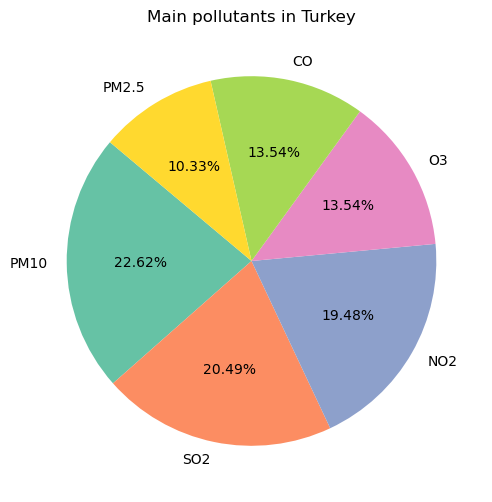

In [51]:
# Filter data for Turkey
country_to_search = 'Turkey'
country_info = data.loc[data['Country Label'] == country_to_search]
country_pollutants = country_info['Pollutant'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(country_pollutants, labels=country_pollutants.index, autopct='%.2f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title(f'Main pollutants in {country_to_search}')
plt.show()

summarize the visualization for all the turkey data

In [52]:
import plotly.express as px

# Function to create map for data
def map(pollution_data, pollutant_name, color_palette):
    filtered_data = pollution_data[pollution_data['Value'] > 0]
    
    fig = px.choropleth(filtered_data, locations="Country Label", locationmode='country names', 
                        color='Value', hover_name="Country Label", 
                        title=f'Most polluted countries by {pollutant_name}', hover_data=['Value'], 
                        color_continuous_scale=color_palette)
    fig.show()

pollutants = ['NO2', 'PM2.5', 'O3', 'CO']
for pollutant in pollutants:
    country_pollutants = data[data['Pollutant'] == pollutant]
    avg_pollution = country_pollutants.groupby('Country Label')['Value'].mean().reset_index()
    
    map(avg_pollution, pollutant, 'plasma')


if needed put description

### 5. Conclusion

In this comprehensive analysis of global air quality, we utilized a robust dataset from OpenDataSoft detailing air quality index (AQI) metrics up to March 2024, sourced from over 50,000 records spanning various countries and cities worldwide. This dataset, derived from Kaggle, provided us with a rich tapestry of information across 10 columns, encompassing aspects such as country and city names, specific pollutants, and their corresponding values. We focused on Turkey because it's in a unique spot between Europe and Asia, and its mix of industry, cities, and environmental rules affects its air quality. We pinpointed the cities with the worst pollution for each major pollutant. This detailed approach showed where urgent action is needed, helping shape policies and ways to cut emissions. In short, our study of global air quality, with a focus on Turkey, uncovered important pollution patterns. It's a useful tool for understanding air quality and guiding policies to protect public health and the environment. We're committed to making complex data easy to understand and relevant for everyone involved.